# Practice Session 01+02: Data preparation

Author: <font color="blue">Pau Peirats</font>

E-mail: <font color="blue">pau.peirats01@estudiant.upf.edu</font>

Date: <font color="blue">05/10/23</font>

# 1. Exploratory data analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
import sklearn

In [3]:
# LEAVE AS-IS

input_dataset = pd.read_csv("device_db.csv", sep=",")

## 1.1. Data types and simple statistics

In [4]:
# PRINT THE DATASET HEADER (COLUMN NAMES) AND THE FIRST FIVE ROWS OF DATA

first_five_rows = input_dataset.head(5)
first_five_rows

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


In [5]:
# DISPLAY A DATAFRAME WITH ONE ROW PER COLUMN, THE TYPE OF THE COLUMN AND THE NUMBER OF DISTINCT ELEMENTS IN IT
cols = input_dataset.columns

column_info = []
for column in cols:
    num_distinct_elements = input_dataset[column].nunique()
    dtype = input_dataset[column].dtype
    column_info.append([column, dtype, num_distinct_elements])


column_type_df = pd.DataFrame(column_info, columns=['COLUMN NAME', 'DTYPE', 'NUMBER OF DISTINCT ELEMENTS'])

column_type_df

,COLUMN NAME,DTYPE,NUMBER OF DISTINCT ELEMENTS
0,PURCHASED_DEVICE,object,101
1,DEVICE_VALUE,float64,368
2,LAST_DEVICE_CHANGE,float64,76
3,DATA_TRAFFIC_MONTH_1,float64,7215
4,DATA_TRAFFIC_MONTH_2,float64,7182
5,DATA_TRAFFIC_MONTH_3,float64,7176
6,DATA_TRAFFIC_MONTH_4,float64,7124
7,DATA_TRAFFIC_MONTH_5,float64,7173
8,DATA_TRAFFIC_MONTH_6,float64,7074
9,VOICE_TRAFFIC_MONTH_1,float64,3550


In [6]:
# CREATE A DATAFRAME WITH THE COLUMNS OF TYPE float64 WITH: NAME OF COLUMN, MEAN, MEADIAN, MAXIMUM, MINIMUM

# will do it similar to previous exercise
cols = input_dataset.columns

column_stats = []
for column in cols:
    if input_dataset[column].dtype == 'float64':
        col_mean = np.mean(input_dataset[column])
        col_median = np.nanmedian(input_dataset[column])
        col_max = np.max(input_dataset[column])
        col_min = np.min(input_dataset[column])
        column_stats.append([column, col_mean, col_median, col_max, col_min])

stats_df = pd.DataFrame(column_stats, columns=['COLUMN NAME', 'MEAN', 'MEDIAN', 'MAXIMUM', 'MINIMUM'])
stats_df

,COLUMN NAME,MEAN,MEDIAN,MAXIMUM,MINIMUM
0,DEVICE_VALUE,7.504842e+02,3.930000e+02,9.057000e+03,15.00
1,LAST_DEVICE_CHANGE,2.016698e+07,2.017060e+07,2.019050e+07,20121001.00
2,DATA_TRAFFIC_MONTH_1,3.481826e+03,1.208728e+03,1.270176e+05,0.00
3,DATA_TRAFFIC_MONTH_2,3.649958e+03,1.294951e+03,1.119488e+05,0.00
4,DATA_TRAFFIC_MONTH_3,3.653427e+03,1.310675e+03,1.119488e+05,0.00
5,DATA_TRAFFIC_MONTH_4,3.269441e+03,1.176539e+03,8.785641e+04,0.00
6,DATA_TRAFFIC_MONTH_5,3.673368e+03,1.287094e+03,1.218348e+05,0.00
7,DATA_TRAFFIC_MONTH_6,3.427690e+03,1.277116e+03,9.055061e+04,0.00
8,VOICE_TRAFFIC_MONTH_1,1.548522e+02,8.405000e+01,4.220100e+03,0.00
9,VOICE_TRAFFIC_MONTH_2,1.425679e+02,7.490000e+01,3.132100e+03,0.00


In [7]:
# PRINT EACH COLUMN NAME AND THEN PRINT STATS FOR THAT COLUMN
for col in input_dataset.columns:
    print(col)
    print(input_dataset[col].describe())
    print()

PURCHASED_DEVICE
count                                                  9853
unique                                                  101
top       TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...
freq                                                   5379
Name: PURCHASED_DEVICE, dtype: object

DEVICE_VALUE
count    9690.000000
mean      750.484211
std       979.710272
min        15.000000
25%       297.000000
50%       393.000000
75%       609.000000
max      9057.000000
Name: DEVICE_VALUE, dtype: float64

LAST_DEVICE_CHANGE
count    7.682000e+03
mean     2.016698e+07
std      1.092577e+04
min      2.012100e+07
25%      2.016080e+07
50%      2.017060e+07
75%      2.017100e+07
max      2.019050e+07
Name: LAST_DEVICE_CHANGE, dtype: float64

DATA_TRAFFIC_MONTH_1
count      8868.000000
mean       3481.825663
std        6364.542706
min           0.000000
25%          51.923114
50%        1208.728050
75%        4249.164900
max      127017.590000
Name: DATA_TRAFFIC_MONTH_1, dtype: float64

D

<font size="+1" color="red">Replace this cell with a brief commentary comparing the previous results for **DEVICE_COST_MONTH_1** (bill in the first month) with the ones from the **.describe()** function.</font>

<font size="+1" color="red">There are at least two differences, indicate them.</font>

In [8]:
#NOT DONE

#PREVIOUS RESULTS
DEVICE_COST_MONTH_1
_mean 1.080778e+01
_nanmedian 0.000000e+00
_max 6.440000e+03
_min 0.00

#DESCRIBE FUNCTION
DEVICE_COST_MONTH_1
count    9999.000000
mean       10.807785
std        75.834602
min         0.000000
25%         0.000000
50%         0.000000
75%         0.620000
max      6440.000000
Name: DEVICE_COST_MONTH_1, dtype: float64

SyntaxError: invalid syntax (1007829515.py, line 5)

In [9]:
#NOT DONE

# The mean is exactly the same, as well as the minimum and the maximum...

## 1.2. Inventory of device models

In [10]:
census_model_df = input_dataset['PREVIOUS_DEVICE_MODEL'].value_counts().reset_index()
census_model_df.head(5)

,index,PREVIOUS_DEVICE_MODEL
0,iPhone 7,425
1,iPhone 6,250
2,Samsung Galaxy J5,243
3,iPhone 6S,212
4,Samsung Galaxy J1 Mini,204


In [11]:
census_brand_df = input_dataset['PREVIOUS_DEVICE_BRAND'].value_counts().reset_index()
census_brand_df

,index,PREVIOUS_DEVICE_BRAND
0,Samsung,1877
1,Outros,1592
2,Apple,1548
3,Motorola,638
4,LG,514


<font size="+1" color="blue">The most common model is the iPhone 7, an Apple model. However, the most common brand is Samsung. I guess this is because Samsung has a lot more models than Apple, therefore, the total selling volume is bigger than Apple.</font>

# 2. Feature engineering

## 2.1. Missing values management

In [12]:
nan_stats = []
for col in input_dataset.columns:
    nan = input_dataset[col].isna().sum() #counts the number of nan elements
    non_nan = input_dataset[col].count() #counts the number of not empty values
    nan_stats.append([col, nan, non_nan])

nan_counter = pd.DataFrame(nan_stats, columns=['COLUMN NAME', 'NUMBER OF NAN', 'NUMBER OF NON NAN'])
nan_counter

,COLUMN NAME,NUMBER OF NAN,NUMBER OF NON NAN
0,PURCHASED_DEVICE,147,9853
1,DEVICE_VALUE,310,9690
2,LAST_DEVICE_CHANGE,2318,7682
3,DATA_TRAFFIC_MONTH_1,1132,8868
4,DATA_TRAFFIC_MONTH_2,1159,8841
5,DATA_TRAFFIC_MONTH_3,1154,8846
6,DATA_TRAFFIC_MONTH_4,1183,8817
7,DATA_TRAFFIC_MONTH_5,1134,8866
8,DATA_TRAFFIC_MONTH_6,1465,8535
9,VOICE_TRAFFIC_MONTH_1,1132,8868


In [13]:
df01 = input_dataset

df01 = df01.dropna(subset=['PURCHASED_DEVICE'])
df01 = df01.dropna(subset=['DEVICE_VALUE'])
df01 = df01.dropna(subset=['PREVIOUS_DEVICE_MODEL'])

#df01

In [14]:
df01['BILLING_MONTH_6'].isna().sum() #before

11

In [15]:
for col in df01.columns[3:26]:
    df01[col] = df01[col].fillna(0)



df01['BILLING_MONTH_6'].isna().sum() #after

0

In [16]:
df01['LINE_ACTIVATION_DATE'] = df01['LINE_ACTIVATION_DATE'].fillna(df01['LAST_DEVICE_CHANGE'])


df01['LINE_ACTIVATION_DATE'].isna().sum() # LAST_DEVICE CHANGE still has NaN

124

In [17]:
#M = input_dataset.shape
#N = df01.shape
M = len(input_dataset)
N = len(df01)
percent_dropped = 100*(M-N)/M

print('Rows in the original dataset: ', M)

print('Rows in the new dataset: ', N, '(', percent_dropped, '% less )')


Rows in the original dataset:  10000
Rows in the new dataset:  5988 ( 40.12 % less )


## 2.2. Distributions, outliers, and correlations

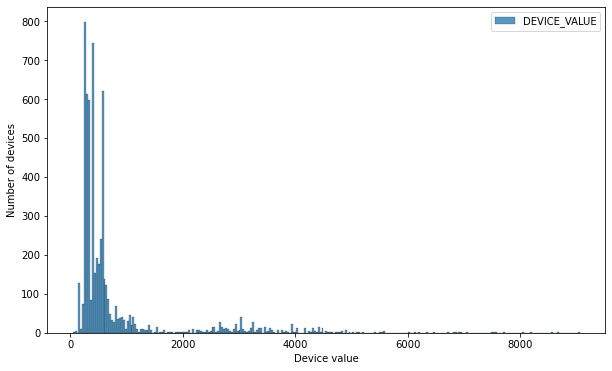

In [18]:
# DEVICE_VALUE
plt.figure(figsize = (10, 6))
sns.histplot(df01['DEVICE_VALUE'], kde=False, label='DEVICE_VALUE')
plt.xlabel('Device value')
plt.ylabel('Number of devices')
plt.legend()
plt.show()

<font size="+1" color="blue">There are more "cheap" devices and we can sort of identify the iPhones (the third highest column)</font>

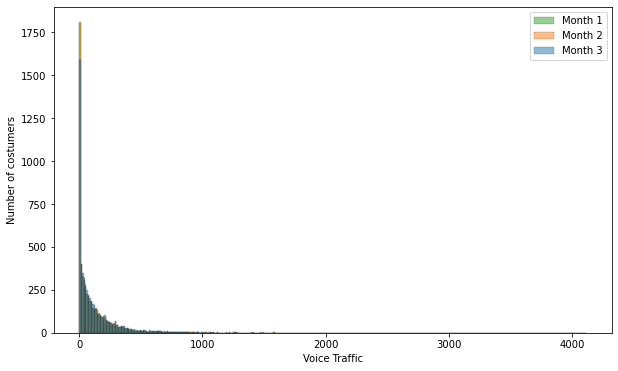

In [19]:
# VOICE_TRAFFIC
plt.figure(figsize = (10, 6))
sns.histplot(df01[['VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3']], kde=False)
plt.xlabel('Voice Traffic')
plt.ylabel('Number of costumers')
plt.legend(labels = ['Month 1', 'Month 2', 'Month 3'])
plt.show()

<font size="+1" color="blue">All months look similar, we can appreciatte a decreasing exponential form with the voice traffic.</font>

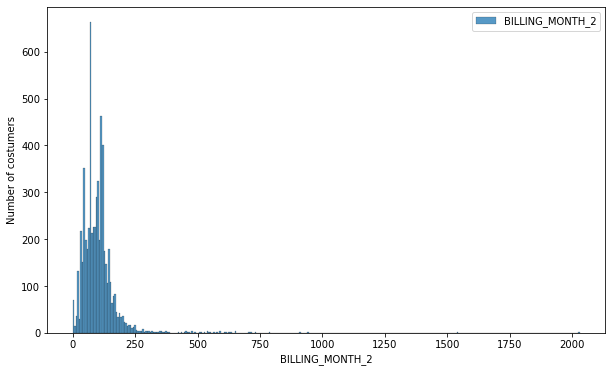

In [20]:
# BILLING_MONTH_2
plt.figure(figsize = (10, 6))
sns.histplot(df01['BILLING_MONTH_2'], kde=False, label='BILLING_MONTH_2')
plt.xlabel('BILLING_MONTH_2')
plt.ylabel('Number of costumers')
plt.legend()
plt.show()

<font size="+1" color="blue">Majority of costumers pay somewhere between 30 and 200 euros the second month</font>

<Figure size 1440x864 with 0 Axes>

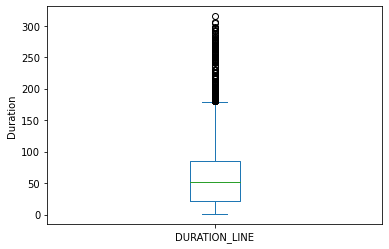

In [21]:
# Boxplot DURATION_LINE
plt.figure(figsize = (20, 12))
df01[['DURATION_LINE']].plot(kind='box')
plt.ylabel('Duration')
plt.show()

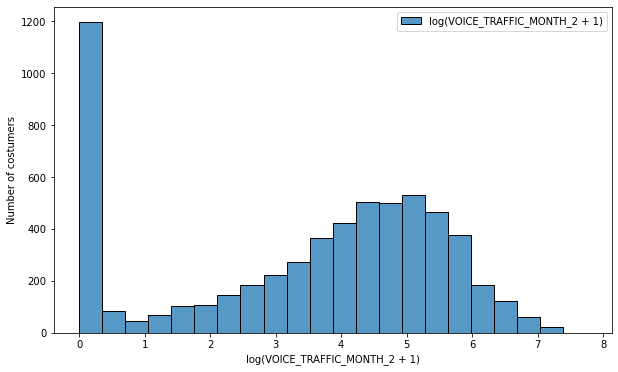

In [22]:
#VOICE_TRAFFIC_MONTH_2
plt.figure(figsize = (10, 6))
sns.histplot(np.log(df01['VOICE_TRAFFIC_MONTH_2'] + 1), kde=False, label='log(VOICE_TRAFFIC_MONTH_2 + 1)')
plt.xlabel('log(VOICE_TRAFFIC_MONTH_2 + 1)')
plt.ylabel('Number of costumers')
plt.legend()
plt.show()

<Figure size 1440x864 with 0 Axes>

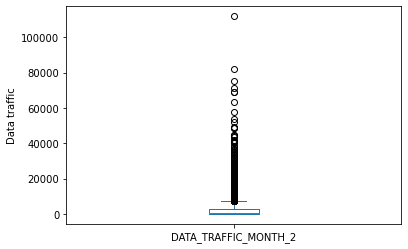

<Figure size 1440x864 with 0 Axes>

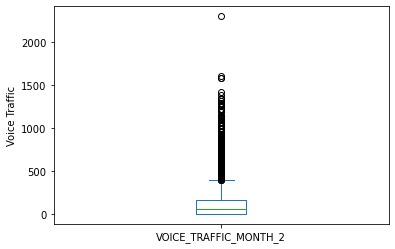

<Figure size 1440x864 with 0 Axes>

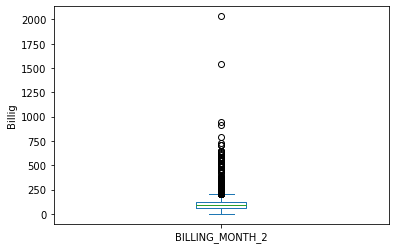

In [23]:
# Boxplot DATA_TRAFFIC_MONTH_2
plt.figure(figsize = (20, 12))
df01[['DATA_TRAFFIC_MONTH_2']].plot(kind='box')
plt.ylabel('Data traffic')
plt.show()

# Boxplot VOICE_TRAFFIC_MONTH_2
plt.figure(figsize = (20, 12))
df01[['VOICE_TRAFFIC_MONTH_2']].plot(kind='box')
plt.ylabel('Voice Traffic')
plt.show()

# Boxplot BILLING_MONTH_2
plt.figure(figsize = (20, 12))
df01[['BILLING_MONTH_2']].plot(kind='box')
plt.ylabel('Billig')
plt.show()

<font size="+1" color="blue">The threshold for outliers should be 50000 for data traffic, 1500 for voice traffic and 750 for billing.</font>

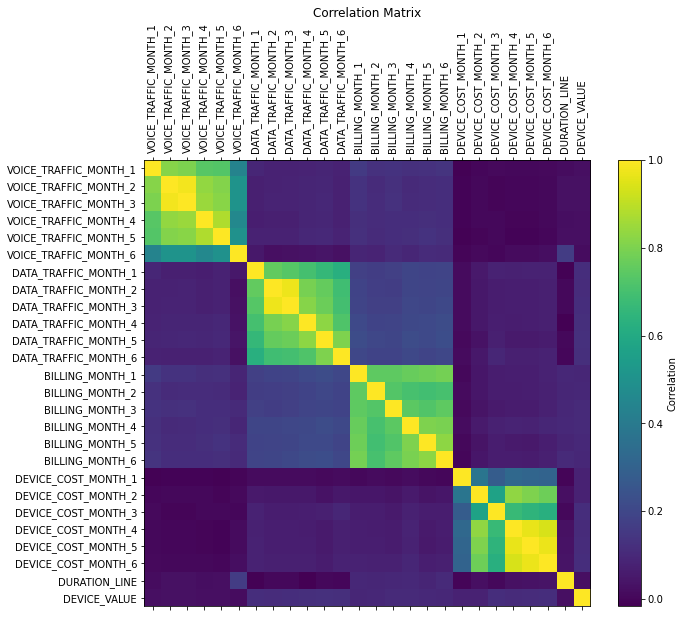

In [24]:
attributes = [
    'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3', 
    'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6',
    'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
    'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
    'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3',
    'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6',
    'DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3',
    'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6',
    'DURATION_LINE', 'DEVICE_VALUE'
]

corr_matrix = df01[attributes].corr()

plt.figure(figsize = (10, 8))
plt.matshow(corr_matrix, fignum = 1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(attributes)), attributes, rotation=90)
plt.yticks(range(len(attributes)), attributes)
plt.title('Correlation Matrix')
plt.show()

<font size="+1" color="blue">We can see that the billing is more related to the data traffic than to the voice traffic. That's pretty intuitive, nowadays data is the major part of the bill, usually voice calls are free.</font>

## 2.3. Date management and period calculation

In [25]:

#df01['LAST_DEVICE_CHANGE'] = df01['LAST_DEVICE_CHANGE'].dropna()
df01 = df01.dropna(subset = ['LAST_DEVICE_CHANGE'])

latest_change = df01['LAST_DEVICE_CHANGE'].astype(int).astype(str)

#latest_change = datetime.datetime.strptime(latest_change, '%Y%m%d')
latest_change = latest_change.apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d'))

df01['LAST_DEVICE_CHANGE'] = latest_change

now = latest_change + datetime.timedelta(days=30)


print('Latest change', latest_change)
print('Now', now)

Latest change 1      2017-04-01
3      2017-10-01
4      2019-01-01
5      2017-09-01
6      2015-07-01
          ...    
9990   2016-10-01
9991   2015-02-01
9992   2016-01-01
9995   2017-04-01
9996   2018-04-01
Name: LAST_DEVICE_CHANGE, Length: 4574, dtype: datetime64[ns]
Now 1      2017-05-01
3      2017-10-31
4      2019-01-31
5      2017-10-01
6      2015-07-31
          ...    
9990   2016-10-31
9991   2015-03-03
9992   2016-01-31
9995   2017-05-01
9996   2018-05-01
Name: LAST_DEVICE_CHANGE, Length: 4574, dtype: datetime64[ns]


In [26]:

series_converted = pd.to_datetime(df01['LAST_DEVICE_CHANGE'], format='%Y%m%d')

difference = (now - series_converted) / datetime.timedelta(days=30) #this will make everything 1 month??
difference = difference.fillna(0).astype(int)

df01['MONTHS_LAST_DEVICE'] = difference

#df01.head(5)

In [27]:
df01 = df01.dropna(subset = ['LINE_ACTIVATION_DATE'])

line_act_date = df01['LINE_ACTIVATION_DATE'].astype(int).astype(str)

line_act_date = line_act_date.apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d'))

df01['LINE_ACTIVATION_DATE'] = line_act_date

df01['DURATION_LINE'] = (now - df01['LINE_ACTIVATION_DATE'])

#df01.head(10)


## 2.4. Standarization and scaling of numerical variables

In [28]:
columns_to_scale = ['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1', 'DEVICE_COST_MONTH_1']

df01[['{}_STAND'.format(col) for col in columns_to_scale]] = StandardScaler().fit_transform(df01[columns_to_scale])
df01[['{}_MINMAX'.format(col) for col in columns_to_scale]] = MinMaxScaler().fit_transform(df01[columns_to_scale])

#df01.head(5)

## 2.5. Convert categorical columns to dummy binary variables

In [29]:
df01['PREVIOUS_DEVICE_BRAND_INT_ENCODED'] = LabelEncoder().fit_transform(df01['PREVIOUS_DEVICE_BRAND'])

#df01['PREVIOUS_DEVICE_BRAND_INT_ENCODED']

In [30]:
manuf_dummies = pd.get_dummies(df01['PREVIOUS_DEVICE_MANUF'])
df01_with_dummies = df01.join(manuf_dummies)
#display(df01_with_dummies)

## 2.6. Feature generation

In [31]:
data_traffic_columns = [f'DATA_TRAFFIC_MONTH_{i}' for i in range(1, 7)]
voice_traffic_columns = [f'VOICE_TRAFFIC_MONTH_{i}' for i in range(1, 7)]
billing_columns = [f'BILLING_MONTH_{i}' for i in range(1, 7)]
device_cost_columns = [f'DEVICE_COST_MONTH_{i}' for i in range(1, 7)]


df01['DATA_TRAFFIC_MEAN'] = df01[data_traffic_columns].mean(axis=1)
df01['DATA_TRAFFIC_MAX'] = df01[data_traffic_columns].max(axis=1)
df01['DATA_TRAFFIC_MIN'] = df01[data_traffic_columns].min(axis=1)
df01['DATA_TRAFFIC_RANGE'] = df01['DATA_TRAFFIC_MAX'] - df01['DATA_TRAFFIC_MIN']

df01['VOICE_TRAFFIC_MEAN'] = df01[voice_traffic_columns].mean(axis=1)
df01['VOICE_TRAFFIC_MAX'] = df01[voice_traffic_columns].max(axis=1)
df01['VOICE_TRAFFIC_MIN'] = df01[voice_traffic_columns].min(axis=1)
df01['VOICE_TRAFFIC_RANGE'] = df01['VOICE_TRAFFIC_MAX'] - df01['VOICE_TRAFFIC_MIN']

df01['BILLING_MEAN'] = df01[billing_columns].mean(axis=1)
df01['BILLING_MAX'] = df01[billing_columns].max(axis=1)
df01['BILLING_MIN'] = df01[billing_columns].min(axis=1)
df01['BILLING_RANGE'] = df01['BILLING_MAX'] - df01['BILLING_MIN']

df01['DEVICE_COST_MEAN'] = df01[device_cost_columns].mean(axis=1)
df01['DEVICE_COST_MAX'] = df01[device_cost_columns].max(axis=1)
df01['DEVICE_COST_MIN'] = df01[device_cost_columns].min(axis=1)
df01['DEVICE_COST_RANGE'] = df01['DEVICE_COST_MAX'] - df01['DEVICE_COST_MIN']

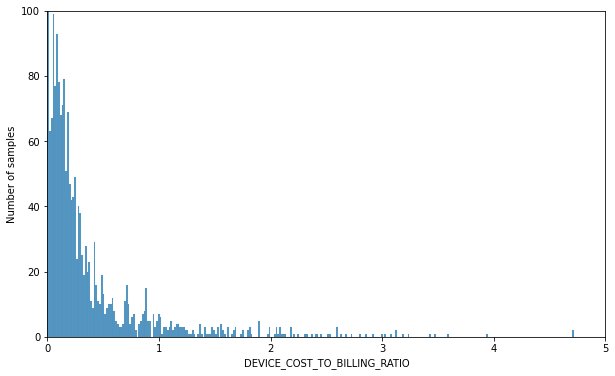

In [32]:
df01['DEVICE_COST_TO_BILLING_RATIO'] = df01['DEVICE_COST_MEAN'] / df01['BILLING_MEAN']

plt.figure(figsize = (10, 6))
sns.histplot(df01['DEVICE_COST_TO_BILLING_RATIO'], kde=False, label='DEVICE_COST_TO_BILLING_RATIO')
plt.xlabel('DEVICE_COST_TO_BILLING_RATIO')
plt.ylabel('Number of samples')
plt.xlim(0, 5)
plt.ylim(0, 100) 
plt.show()


<font size="+1" color="blue">It looks like a Poisson or an Exponential distribution.</font>

## 2.7. Text parsing/processing

In [33]:
df01[['PURCHASED_DEVICE_CODE', 'PURCHASED_DEVICE_MANUFACTURER', 'PURCHASED_DEVICE_MODEL']] = df01['PURCHASED_DEVICE'].str.split(' |_', n=2, expand=True)

#df01.head(10)

In [34]:
# Done similar to exercise 1.2

census_old_manuf_df = df01['PREVIOUS_DEVICE_MANUF'].value_counts().reset_index()
census_old_manuf_df.head(7)

,index,PREVIOUS_DEVICE_MANUF
0,Samsung Korea,1458
1,Apple Inc,1122
2,"Motorola Mobility LLC, a Lenovo Company",630
3,LG Electronics Inc.,368
4,TCL Communication Ltd,241
5,"Microsoft Mobile Oy, Nokia Corporation",117
6,Nokia Corporation,115


In [35]:
census_new_manuf_df = df01['PURCHASED_DEVICE_MANUFACTURER'].value_counts().reset_index()
census_new_manuf_df

,index,PURCHASED_DEVICE_MANUFACTURER
0,LG,2651
1,SAMSUNG,868
2,MOTOROLA,500
3,APPLE,348
4,ALCATEL,207


## 2.8. Splitting and sampling a dataset

In [36]:
df70_train, df30_test = train_test_split(df01, test_size=0.3, random_state=42)

#display(df70_train)
#display(df30_test)

In [38]:
# Code similar to exercise 1.1

#DF70_TRAIN
columns_needed = ['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']
stats_df70 = []
for column in columns_needed:
    col_mean = np.mean(df70_train[column])
    col_std = df70_train[column].std()
    col_min = np.min(df70_train[column])
    col_max = np.max(df70_train[column])
    col_25 = df70_train[column].quantile(0.25)
    col_50 = df70_train[column].quantile(0.50)
    col_75 = df70_train[column].quantile(0.75)
    stats_df70.append([column, col_mean, col_std, col_min, col_max, col_25, col_50, col_75])

stats_70_train = pd.DataFrame(stats_df70, columns=['COLUMN NAME', 'MEAN', 'STD', 'MINIMUM', 'MAXIMUM', '25%', '50%', '75%'])
stats_70_train

,COLUMN NAME,MEAN,STD,MINIMUM,MAXIMUM,25%,50%,75%
0,DATA_TRAFFIC_MONTH_1,2697.519665,6254.654782,0.00,112421.17,0.0,390.349700,2776.16020
1,VOICE_TRAFFIC_MONTH_1,134.159013,209.157312,0.00,4113.00,10.1,63.099998,173.89999
2,BILLING_MONTH_1,99.970556,64.722421,-124.49,820.40,64.0,92.990000,121.14000


In [39]:
#DF30_TEST

columns_needed = ['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']
stats_df30 = []
for column in columns_needed:
    col_mean = np.mean(df30_test[column])
    col_std = df30_test[column].std()
    col_min = np.min(df30_test[column])
    col_max = np.max(df30_test[column])
    col_25 = df30_test[column].quantile(0.25)
    col_50 = df30_test[column].quantile(0.50)
    col_75 = df30_test[column].quantile(0.75)
    stats_df30.append([column, col_mean, col_std, col_min, col_max, col_25, col_50, col_75])

stats_30_test = pd.DataFrame(stats_df30, columns=['COLUMN NAME', 'MEAN', 'STD', 'MINIMUM', 'MAXIMUM', '25%', '50%', '75%'])
stats_30_test

,COLUMN NAME,MEAN,STD,MINIMUM,MAXIMUM,25%,50%,75%
0,DATA_TRAFFIC_MONTH_1,2625.958652,5750.402231,0.0,79988.18,0.00,392.559420,2724.62920
1,VOICE_TRAFFIC_MONTH_1,132.780918,190.879559,0.0,1501.30,10.10,67.599998,173.10001
2,BILLING_MONTH_1,100.433350,66.811856,0.0,926.41,64.96,93.920000,120.84000


<font size="+1" color="blue">The stats are pretty similar. The mean and the quantiles are virtually the same, while the std and min are a little bit different. I'm guessing the std would be similar too if the dataset was divided 50-50.</font>

# 3. Comparing iPhone and Samsung J series users

In [40]:
#APPLE
iphone_users = df01[df01['PURCHASED_DEVICE_MANUFACTURER'] == 'APPLE']

#SAMSUNG J
samsung_j_users = df01[df01['PURCHASED_DEVICE_MANUFACTURER'] == 'SAMSUNG']
samsung_j_users = samsung_j_users[samsung_j_users['PURCHASED_DEVICE_MODEL'].str.startswith('J')]

#display(samsung_j_users)
#display(iphone_users)

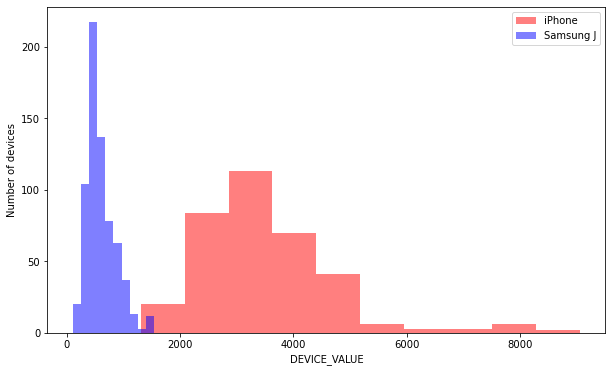

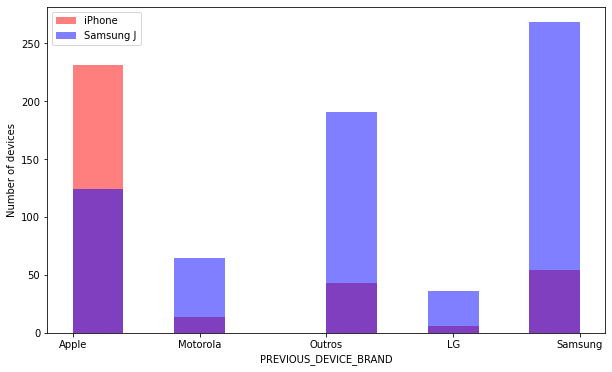

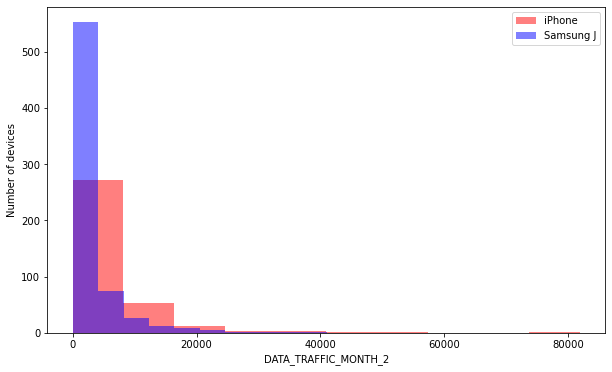

In [41]:
compare_variables = ['DEVICE_VALUE', 'PREVIOUS_DEVICE_BRAND', 'DATA_TRAFFIC_MONTH_2']

for var in compare_variables:
    plt.figure(figsize = (10, 6))
    plt.hist(iphone_users[var], alpha=0.5, label='iPhone', color='red')
    plt.hist(samsung_j_users[var], alpha=0.5, label='Samsung J', color='blue')
    plt.xlabel(var)
    plt.ylabel('Number of devices')
    plt.legend()
    plt.show()

<font size="+1" color="blue">We can extract some conclusions from these histograms. 
Firstly, Samsung J is a cheaper phone than iPhone. Secondly, Apple users were Apple constumers in the past, whereas Samsung J users have had different phones prior to Samsung (although majority still had Samsung). Lastly, there is not a lot of differece in terms of data traffic between the two models.</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>